# Bank Customer Churn Prediction

OVERVIEW ON THE DATASET

IMPORT NECESSARY LIBRARIES

In [543]:
#import libraries for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [544]:
#import libraries for modelling
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_curve,roc_auc_score,classification_report
from keras.models import Sequential
from keras.callbacks import Callback,EarlyStopping,History,ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
from keras.layers import Dense,BatchNormalization

IMPORT DATA

In [545]:
 data=pd.read_csv('../RN7/data/BankCustomers.csv',encoding= 'unicode_escape')

In [546]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [548]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [549]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

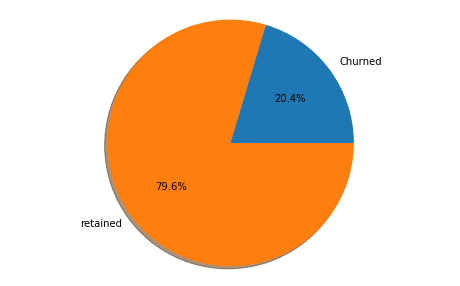

In [550]:

size=[data[data.Exited==1].count().Exited,data[data.Exited==0].count().Exited]
label=['Churned','retained']
fig,ax=plt.subplots(figsize=(8,5))
ax.pie(size,labels=label,autopct='%1.1f%%',shadow=True,)
ax.axis('equal')
plt.show()

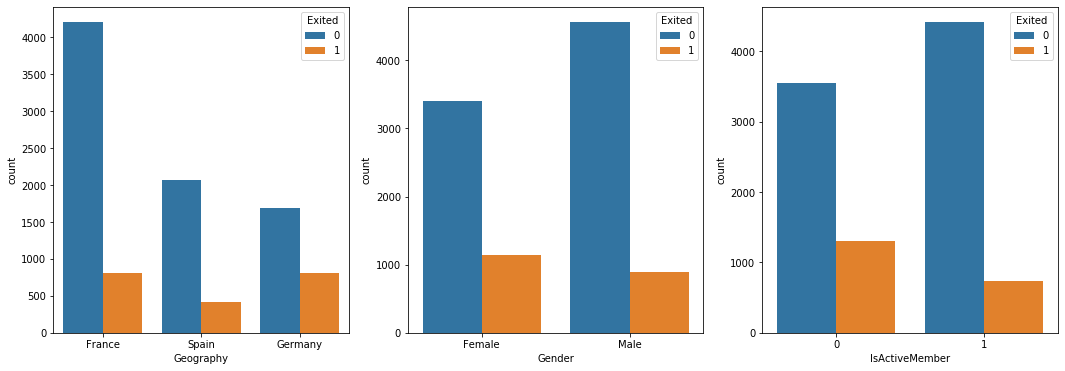

In [551]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='Geography',data=data,hue='Exited',ax=ax[0])
sns.countplot(x='Gender',data=data,hue='Exited',ax=ax[1])
sns.countplot(x='IsActiveMember',data=data,hue='Exited',ax=ax[2])

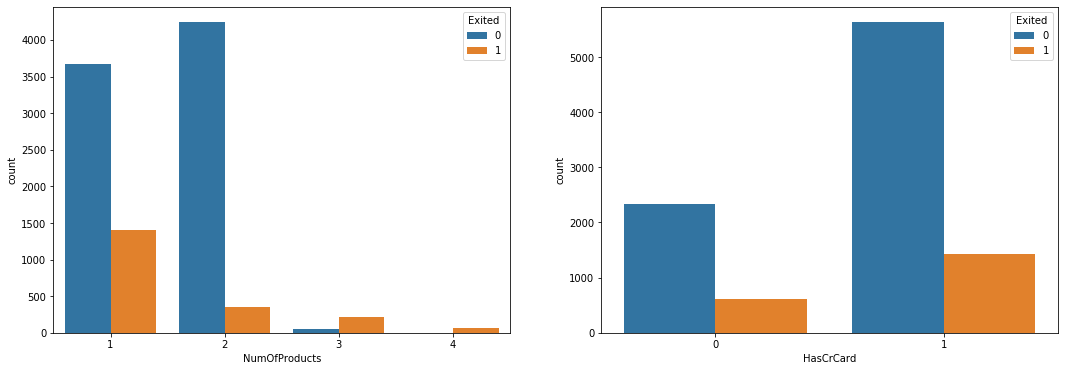

In [552]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x='NumOfProducts',data=data,hue='Exited',ax=ax[0])
sns.countplot(x='HasCrCard',data=data,hue='Exited',ax=ax[1])

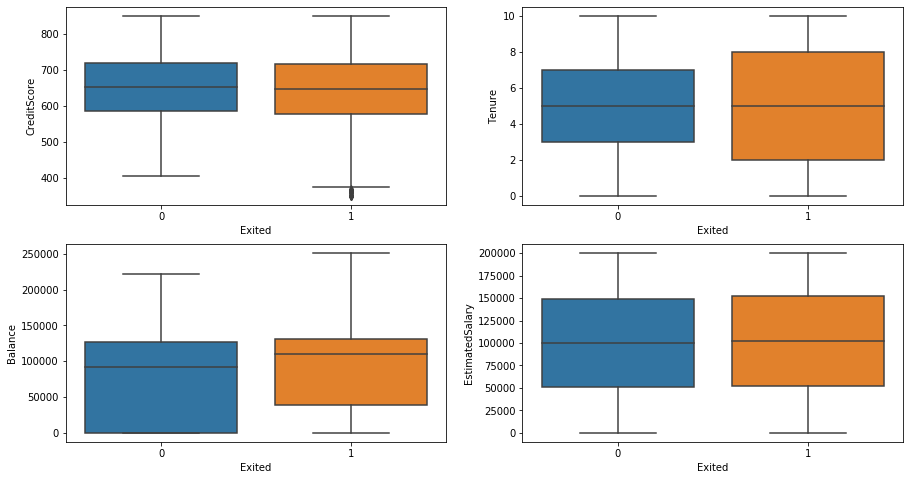

In [553]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.boxplot(x='Exited',y='CreditScore',data=data,ax=ax[0][0])
sns.boxplot(x='Exited',y='Tenure',data=data,ax=ax[0][1])
sns.boxplot(x='Exited',y='Balance',data=data,ax=ax[1][0])
sns.boxplot(x='Exited',y='EstimatedSalary',data=data,ax=ax[1][1])

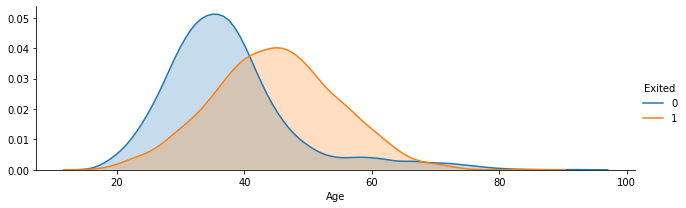

In [554]:
face = sns.FacetGrid(data, hue="Exited",aspect=3)
face.map(sns.kdeplot,"Age",shade= True)
face.add_legend()
plt.show()

Customers of ag between 35 to 55 are more likely to churn

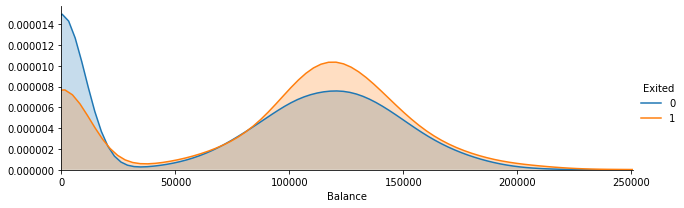

In [555]:
face = sns.FacetGrid(data, hue="Exited",aspect=3)
face.map(sns.kdeplot,"Balance",shade= True)
face.set(xlim=(0, data["Balance"].max()))
face.add_legend()
plt.show()

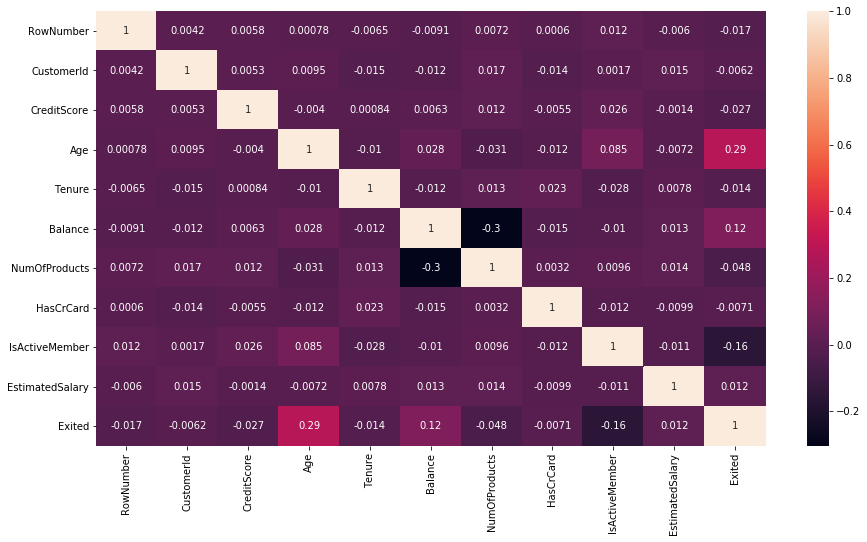

In [556]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,)

DATA PREPARATION

In [557]:
#Split data into features and labels
X=data.drop(['Exited'],axis=1)
y=data['Exited']

In [558]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [559]:
#check no of unique values in each column of X
X.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
dtype: int64

In [560]:
#Drop unnecessary features
X.drop(['RowNumber','CustomerId'],inplace=True,axis=1)

In [561]:
#Convert categorical feature into numerical feature by using one-hot encoding
state=pd.get_dummies(X['Geography'])
gender=pd.get_dummies(X['Gender'])

In [562]:
#concatenate newly created feature with X
X=pd.concat([X,state,gender],axis=1)

In [563]:
#Drop unnecessary features by droping column wise
X.drop(['Surname','Geography','Gender'],inplace=True,axis=1)

In [564]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


SAMPLING

In [585]:
#import packages for SMOTE
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE(random_state=42)
X_sample,y_sample=over_sampling.fit_sample(X,y)

In [566]:
print(Counter(y))
print(Counter(y_sample))

Counter({0: 7963, 1: 2037})
Counter({1: 7963, 0: 7963})


In [567]:
print("No of retained customer before sampling {} and no of churned customer before sampling {}".format(Counter(y)[0],Counter(y)[1]))
print("No of retained customer after sampling {} and no of churned customer after sampling {}".format(Counter(y_sample)[0],Counter(y_sample)[1]))

No of retained customer before sampling 7963 and no of churned customer before sampling 2037
No of retained customer after sampling 7963 and no of churned customer after sampling 7963


SPLIT DATASET FOR TRAINING

In [568]:
#split data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.2,random_state=0)

NORMALIZE DATA

Each feature of the data is of different scale So we need to normalize the data into same scale having mean 0 and standard deviation 1  for better model prediction

In [569]:
#create instance of StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

CREATE ANN MODEL

In [570]:
#Initialising the ANN
model=Sequential()
#add input layer and first hidden layer
model.add(Dense(6,input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
#add second hidden layer
model.add(Dense(6,activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
#add third hidden layer
model.add(Dense(6,activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
#add output layer
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
#compiling the ANN
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [571]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 6)                 84        
_________________________________________________________________
batch_normalization_61 (Batc (None, 6)                 24        
_________________________________________________________________
dense_143 (Dense)            (None, 6)                 42        
_________________________________________________________________
batch_normalization_62 (Batc (None, 6)                 24        
_________________________________________________________________
dense_144 (Dense)            (None, 6)                 42        
_________________________________________________________________
batch_normalization_63 (Batc (None, 6)                 24        
_________________________________________________________________
dense_145 (Dense)            (None, 1)               

In [572]:
#Fitting the ANN to the training set
history=model.fit(X_train,y_train,epochs=100,batch_size=64,validation_split=0.2)

Train on 10192 samples, validate on 2548 samples
Epoch 1/100
10192/10192 [==============================] - 7s 661us/step - loss: 0.5530 - accuracy: 0.7660 - val_loss: 0.6819 - val_accuracy: 0.8422
Epoch 2/100
10192/10192 [==============================] - 1s 70us/step - loss: 0.3466 - accuracy: 0.8651 - val_loss: 0.5754 - val_accuracy: 0.8203
Epoch 3/100
10192/10192 [==============================] - 1s 70us/step - loss: 0.3164 - accuracy: 0.8652 - val_loss: 0.3646 - val_accuracy: 0.8626
Epoch 4/100
10192/10192 [==============================] - 1s 76us/step - loss: 0.3072 - accuracy: 0.8697 - val_loss: 0.3028 - val_accuracy: 0.8736
Epoch 5/100
10192/10192 [==============================] - 1s 77us/step - loss: 0.3021 - accuracy: 0.8660 - val_loss: 0.2979 - val_accuracy: 0.8713
Epoch 6/100
10192/10192 [==============================] - 1s 69us/step - loss: 0.3039 - accuracy: 0.8688 - val_loss: 0.2958 - val_accuracy: 0.8709
Epoch 7/100
10192/10192 [==============================] - 1s 

Epoch 56/100
10192/10192 [==============================] - 1s 67us/step - loss: 0.2852 - accuracy: 0.8730 - val_loss: 0.2892 - val_accuracy: 0.8689
Epoch 57/100
10192/10192 [==============================] - 1s 65us/step - loss: 0.2854 - accuracy: 0.8725 - val_loss: 0.2889 - val_accuracy: 0.8724
Epoch 58/100
10192/10192 [==============================] - 1s 65us/step - loss: 0.2831 - accuracy: 0.8760 - val_loss: 0.2875 - val_accuracy: 0.8693
Epoch 59/100
10192/10192 [==============================] - 1s 72us/step - loss: 0.2847 - accuracy: 0.8741 - val_loss: 0.2863 - val_accuracy: 0.8697
Epoch 60/100
10192/10192 [==============================] - 1s 73us/step - loss: 0.2893 - accuracy: 0.8708 - val_loss: 0.2884 - val_accuracy: 0.8756
Epoch 61/100
10192/10192 [==============================] - 1s 69us/step - loss: 0.2866 - accuracy: 0.8740 - val_loss: 0.2865 - val_accuracy: 0.8713
Epoch 62/100
10192/10192 [==============================] - 1s 71us/step - loss: 0.2859 - accuracy: 0.8743

In [573]:
#evaluate model performance
eva=model.evaluate(X_test,y_test)
print("loss value of model is {} and accuracy is {}".format(eva[0],eva[1]))

3186/3186 [==============================] - 0s 48us/step
loss value of model is 0.2834113085150195 and accuracy is 0.8684871196746826


VISUALIZING MODEL PERFORMANCE

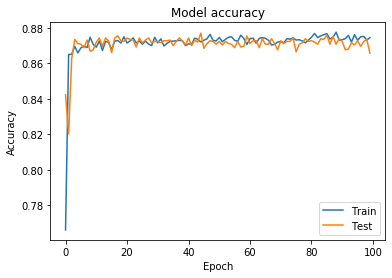

In [574]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

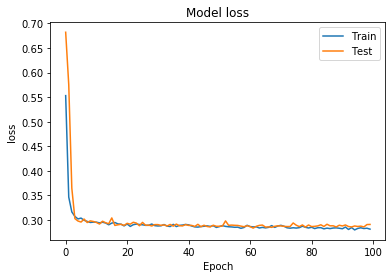

In [575]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Make it pretty
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

TEST MODEL PERFORMANCE ON UNSEEN DATA

In [576]:
prediction = model.predict(X_test)
y_pred=[]
for i in range(len(prediction)):
    if prediction[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [577]:
confusion_matrix(y_test,y_pred)

array([[1430,  160],
       [ 259, 1337]], dtype=int64)

In [578]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [579]:
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 2767 and misclassified 419 cases out of 3186 


In [580]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.8684871311989956 accuracy on test data


In [581]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1590
           1       0.89      0.84      0.86      1596

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [582]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.868545183714002


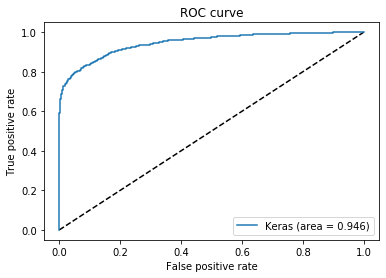

In [583]:
#ROC_AUC_CURVE IS GIVEN BELOW
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

CONCLUSION